In [1]:
import rasterio
import numpy as np
from rasterio.plot import show
from pyproj import Proj, transform

Координатна система: EPSG:4326
Bounding box: 29.566633136000007 49.434589403000004 31.185382877000006 50.486672568


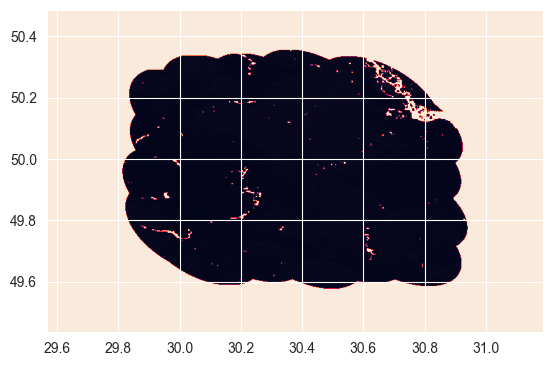

Bounding box (в градусах): 49.434589403000004 29.566633136000007 31.185382877000006 50.486672568


C:\Users\Admin\AppData\Local\Temp\ipykernel_11680\467614082.py:13: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  left, bottom, right, top = transform(in_proj, out_proj, left, bottom, right, top)


In [2]:
with rasterio.open('./soil_moisture.tif') as dataset:
    # Виведення системи координат
    print('Координатна система:', dataset.crs)
    # Виведення bounding box
    left, bottom, right, top = dataset.bounds
    print('Bounding box:', left, bottom, right, top)
    # Відображення зображення
    show(dataset)

# Преобразування координат
in_proj = Proj(dataset.crs)
out_proj = Proj(proj='latlong')
left, bottom, right, top = transform(in_proj, out_proj, left, bottom, right, top)

# Виведення нового bounding box в градусах
print('Bounding box (в градусах):', left, bottom, right, top)

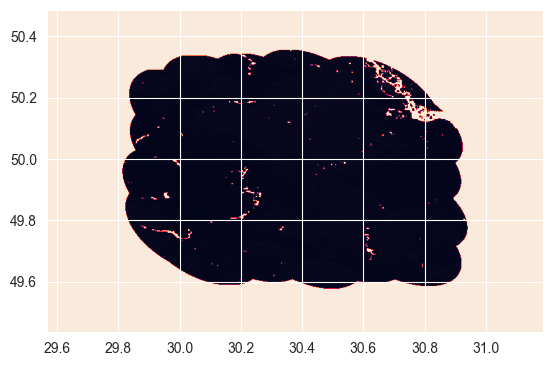

Кількість точок з коректним значеннями вологості: 392385
Кількість точок з помилками розрахунку: 0


In [3]:
with rasterio.open('./soil_moisture.tif') as dataset:
    # Отримання вологості як numpy масив
    moisture = dataset.read(1)
    # Встановлення нульових значень на місці помилок
    moisture[moisture == dataset.nodata] = 0
    # Відображення зображення
    show(dataset)

    # Підрахунок кількості точок з коректним значеннями вологості
    valid_count = np.count_nonzero(moisture)
    # Підрахунок кількості точок з помилками розрахунку
    invalid_count = moisture.size - valid_count

    print('Кількість точок з коректним значеннями вологості:', valid_count)
    print('Кількість точок з помилками розрахунку:', invalid_count)